In [1]:
!pip install beautifulsoup4
!pip install lxml
!conda install -c conda-forge folium=0.5.0 --yes
import requests 
import pandas as pd 
import numpy as np 
import random
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim 
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html
from pandas.io.json import json_normalize
import folium 
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans




/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environ

## This Section is for Task #1: "Create a dataframe through webscraping of wikipedia page"

In [2]:
# Webscraping using beautiful soup
url = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(url,'lxml')
soup.prettify()
table=soup.find_all("td")

df=pd.DataFrame(columns=["Postcode","Borough","Neighborhood"])
df

,Postcode,Borough,Neighborhood


## Cleaning and Preprocessing of dataframe

In [3]:
# Not assigned will be removed from the dataframe
for i in range(179):
    Postcode=table[i].b.text
    borough=table[i].find_all("a")
    if len(borough)==0:
        Borough="Not assigned"
        Neighborhood="Not assigned"
    else:    
        if len(borough)==1:
            Borough=borough[0].text
            Neighborhood="Not assigned"
        else:
            Borough=borough[0].text
            Neighborhood=borough[1].text
    df.loc[i]=[Postcode,Borough,Neighborhood]

In [4]:
df.replace("Not assigned",np.nan,inplace=True)
df.dropna(inplace=True)
df = df.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
df.columns = ['Postcode', 'Borough', 'Neighborhood']
df.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,Malvern
1,M1C,Scarborough,Rouge Hill
2,M1E,Scarborough,Guildwood
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


## The coordinates of will be retrieved from the cocl site and merged into the dataframe

In [5]:
coordinates = pd.read_csv('https://cocl.us/Geospatial_data')
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
# using .merge code, dataframe df and coordinates will be merged.
coordinates.rename(columns={'Postal Code':'Postcode'},inplace=True)
df3 = pd.merge(df,coordinates,on='Postcode')
df3.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill,43.784535,-79.160497
2,M1E,Scarborough,Guildwood,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [7]:
df_final = df3[df3['Borough'].str.contains('Toronto',regex=False)]
df_final

,Postcode,Borough,Neighborhood,Latitude,Longitude
44,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
45,M4X,Downtown Toronto,St. James Town,43.667967,-79.367675
46,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
47,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
48,M5B,Downtown Toronto,Garden District,43.657162,-79.378937
49,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
50,M5G,Downtown Toronto,Bay Street,43.657952,-79.387383
51,M5H,Downtown Toronto,Richmond,43.650571,-79.384568
52,M5J,Downtown Toronto,Harbourfront,43.640816,-79.381752
53,M5K,Downtown Toronto,Toronto Dominion Centre,43.647177,-79.381576


## Foursquare API Credetials

In [8]:
CLIENT_ID = 'PSVFZEQM2ILMHB20BTOF02YVDSU4YHBPXTWWA1CLWWCUWJAQ' # your Foursquare ID
CLIENT_SECRET = 'TBCUINECRUEAEKQTAVO3DTQ5UI4SZQCLIXZQ4EJQJLHKBEMN' # your Foursquare Secret
ACCESS_TOKEN = 'JKGFAVTBUJPVOYR2H2V1LRICYPTWXEUZTT2CUY1OCX1RLWJB' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: PSVFZEQM2ILMHB20BTOF02YVDSU4YHBPXTWWA1CLWWCUWJAQ
CLIENT_SECRET:TBCUINECRUEAEKQTAVO3DTQ5UI4SZQCLIXZQ4EJQJLHKBEMN


## Map of Toronto

In [9]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighborhood in zip(df_final['Latitude'],df_final['Longitude'],df_final['Borough'],df_final['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

In [10]:
neighborhood_latitude = 43.651070
neighborhood_longitude = -79.347015

In [11]:
LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=PSVFZEQM2ILMHB20BTOF02YVDSU4YHBPXTWWA1CLWWCUWJAQ&client_secret=TBCUINECRUEAEKQTAVO3DTQ5UI4SZQCLIXZQ4EJQJLHKBEMN&v=20180604&ll=43.65107,-79.347015&radius=600&limit=15'

In [12]:
results = requests.get(url).json()

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,BATLgrounds,Athletics & Sports,43.647088,-79.351306
1,"Pan Am Path, Don Landing",Trail,43.653752,-79.350744
2,McCleary Park,Baseball Field,43.652116,-79.340865
3,BATL Grounds,Recreation Center,43.647160,-79.351525


In [15]:
print (nearby_venues['categories'].value_counts()[0:15])

Recreation Center     1
Athletics & Sports    1
Baseball Field        1
Trail                 1
Name: categories, dtype: int64


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [17]:
Toronto_venues = getNearbyVenues(names=df_final['Neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Rosedale
St. James Town
Church and Wellesley
Regent Park
Garden District
St. James Town
Bay Street
Richmond
Harbourfront
Toronto Dominion Centre
Commerce Court
University of Toronto
Kensington Market
CN Tower
First Canadian Place


In [18]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Toronto_Venues_only_restaurant = Toronto_venues[Toronto_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Toronto_Venues_only_restaurant.index = np.arange(1, len(Toronto_Venues_only_restaurant )+1)

In [19]:
print('There are {} unique categories.'.format(len(Toronto_Venues_only_restaurant['Venue Category'].unique())))

There are 22 unique categories.


In [20]:
# create a dataframe of top 10 categories
Toronto_Venues_Top10 = Toronto_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Toronto_Venues_Top10 = Toronto_Venues_Top10.reset_index()
Toronto_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Toronto_Venues_Top10

,Venue_Category,Frequency
0,Japanese Restaurant,36
1,Thai Restaurant,25
2,Italian Restaurant,24
3,Restaurant,22
4,French Restaurant,21
5,Mediterranean Restaurant,17
6,Ramen Restaurant,17
7,American Restaurant,16
8,Spanish Restaurant,10
9,Vietnamese Restaurant,9


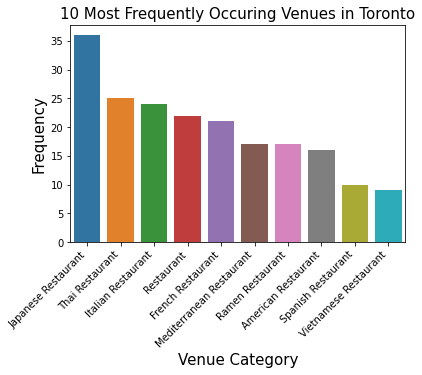

<Figure size 1296x504 with 0 Axes>

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Toronto_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Toronto', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [22]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Toronto_Venues_only_restaurant.shape)
Toronto_Venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (245, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Rosedale,43.679563,-79.377529,Sabai Sabai,43.670647,-79.384857,Thai Restaurant
2,Rosedale,43.679563,-79.377529,Paramount Fine Foods,43.670677,-79.389865,Middle Eastern Restaurant
3,Rosedale,43.679563,-79.377529,Terroni,43.679870,-79.390525,Italian Restaurant
4,Rosedale,43.679563,-79.377529,Storm Crow Manor,43.666840,-79.381593,Theme Restaurant
5,Rosedale,43.679563,-79.377529,King's Palace,43.672214,-79.385843,Indian Restaurant
...,...,...,...,...,...,...,...
71,Regent Park,43.654260,-79.360636,Hokkaido Ramen Santouka らーめん山頭火,43.656435,-79.377586,Ramen Restaurant
72,Regent Park,43.654260,-79.360636,Chotto Matte,43.646473,-79.378782,Japanese Restaurant
73,Regent Park,43.654260,-79.360636,Storm Crow Manor,43.666840,-79.381593,Theme Restaurant
74,Regent Park,43.654260,-79.360636,Pai,43.647923,-79.388579,Thai Restaurant


In [23]:
Toronto_Venues_restaurant = Toronto_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())


In [24]:
Toronto_Venues_restaurant_df  = Toronto_Venues_restaurant.to_frame().reset_index()
Toronto_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Toronto_Venues_restaurant_df.index = np.arange(1, len(Toronto_Venues_restaurant_df)+1)
list_rest_no = Toronto_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = Toronto_Venues_restaurant_df['Neighborhood'].to_list()

In [25]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighborhood,American Restaurant,Caribbean Restaurant,Doner Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,...,Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rosedale,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Rosedale,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
venues_grouped = Toronto_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

,Neighborhood,American Restaurant,Caribbean Restaurant,Doner Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,...,Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Bay Street,1,0,1,1,0,0,0,3,1,...,3,0,0,1,0,0,2,0,0,1
1,CN Tower,0,1,0,2,0,0,3,1,1,...,1,2,0,1,0,0,1,0,0,0
2,Church and Wellesley,2,0,1,2,0,0,1,2,1,...,2,0,0,0,0,1,3,0,0,1
3,Commerce Court,1,0,0,2,0,0,1,2,1,...,1,1,0,1,0,0,1,0,0,1
4,First Canadian Place,1,0,0,1,0,0,1,2,1,...,1,0,0,1,0,0,2,0,0,1
5,Garden District,2,0,0,1,0,0,0,3,1,...,1,0,0,1,0,0,3,0,0,1
6,Harbourfront,1,1,0,2,0,0,2,3,1,...,2,2,0,1,0,0,1,0,1,0
7,Kensington Market,1,1,1,1,0,0,1,1,1,...,2,0,0,1,0,2,1,0,0,1
8,Regent Park,1,0,0,1,0,0,1,3,2,...,0,0,0,0,0,0,2,1,0,0
9,Richmond,1,0,0,1,0,0,2,4,1,...,2,1,0,1,0,0,1,0,1,1


In [27]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bay Street----
                       venue  freq
0        Japanese Restaurant   3.0
1                 Restaurant   3.0
2           Ramen Restaurant   2.0
3            Thai Restaurant   2.0
4         Spanish Restaurant   1.0
5  Middle Eastern Restaurant   1.0
6   Mediterranean Restaurant   1.0
7        American Restaurant   1.0
8          French Restaurant   1.0
9           Doner Restaurant   1.0


----CN Tower----
                      venue  freq
0        Italian Restaurant   3.0
1         French Restaurant   2.0
2        Seafood Restaurant   2.0
3          Ramen Restaurant   1.0
4        Spanish Restaurant   1.0
5           Thai Restaurant   1.0
6       Japanese Restaurant   1.0
7  Mediterranean Restaurant   1.0
8        Mexican Restaurant   1.0
9      Caribbean Restaurant   1.0


----Church and Wellesley----
                      venue  freq
0           Thai Restaurant   3.0
1       American Restaurant   2.0
2       Japanese Restaurant   2.0
3         French Restaurant   2.0
4 

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Street,Japanese Restaurant,Restaurant,Ramen Restaurant,Thai Restaurant,Spanish Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,American Restaurant,French Restaurant,Doner Restaurant
1,CN Tower,Italian Restaurant,French Restaurant,Seafood Restaurant,Ramen Restaurant,Spanish Restaurant,Thai Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Caribbean Restaurant
2,Church and Wellesley,Thai Restaurant,American Restaurant,Japanese Restaurant,French Restaurant,Restaurant,Tapas Restaurant,Mediterranean Restaurant,Ramen Restaurant,Italian Restaurant,Doner Restaurant
3,Commerce Court,French Restaurant,Japanese Restaurant,American Restaurant,Mexican Restaurant,Thai Restaurant,Spanish Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,Mediterranean Restaurant
4,First Canadian Place,Japanese Restaurant,Thai Restaurant,American Restaurant,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Ramen Restaurant,Italian Restaurant,French Restaurant,Vietnamese Restaurant


In [30]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'American Restaurant',
 'Caribbean Restaurant',
 'Doner Restaurant',
 'French Restaurant',
 'Greek Restaurant',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Ramen Restaurant',
 'Restaurant',
 'Seafood Restaurant',
 'South American Restaurant',
 'Spanish Restaurant',
 'Sushi Restaurant',
 'Tapas Restaurant',
 'Thai Restaurant',
 'Theme Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant']

In [31]:
total_restaurants = venues_grouped['American Restaurant']+\
venues_grouped['Caribbean Restaurant']+\
venues_grouped['Doner Restaurant']+venues_grouped['French Restaurant']+\
venues_grouped['Greek Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Japanese Restaurant']+venues_grouped['Mediterranean Restaurant']+venues_grouped['Mexican Restaurant']+\
venues_grouped['Middle Eastern Restaurant']+venues_grouped['Ramen Restaurant']+venues_grouped['Restaurant']+\
venues_grouped['Seafood Restaurant']+venues_grouped['South American Restaurant']+\
venues_grouped['Spanish Restaurant']+venues_grouped['Sushi Restaurant']+\
venues_grouped['Tapas Restaurant']+venues_grouped['Thai Restaurant']+\
venues_grouped['Theme Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Vietnamese Restaurant']

In [32]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Japanese Restaurants':venues_grouped['Japanese Restaurant']})

In [33]:
df_restaurants.head(10)

,Neighborhood,Total Restaurants,Japanese Restaurants
0,Bay Street,17,3
1,CN Tower,15,1
2,Church and Wellesley,17,2
3,Commerce Court,14,2
4,First Canadian Place,12,2
5,Garden District,14,3
6,Harbourfront,20,3
7,Kensington Market,15,1
8,Regent Park,12,3
9,Richmond,18,4


In [34]:
df_restaurants

,Neighborhood,Total Restaurants,Japanese Restaurants
0,Bay Street,17,3
1,CN Tower,15,1
2,Church and Wellesley,17,2
3,Commerce Court,14,2
4,First Canadian Place,12,2
5,Garden District,14,3
6,Harbourfront,20,3
7,Kensington Market,15,1
8,Regent Park,12,3
9,Richmond,18,4


In [35]:
# set number of clusters
kclusters = 5

grouped_clustering = df_restaurants.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 0, 4, 0, 2, 0, 4, 2], dtype=int32)

In [36]:
# add clustering labels
df_restaurants.insert(0, 'Cluster Labels', kmeans.labels_)

In [37]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
data_merged = df_final.join(df_restaurants.set_index('Neighborhood'), on='Neighborhood')

data_merged.head() 

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Total Restaurants,Japanese Restaurants
44,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,3,27,3
45,M4X,Downtown Toronto,St. James Town,43.667967,-79.367675,1,32,5
46,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,2,17,2
47,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,4,12,3
48,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,0,14,3


In [38]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires in zip(data_merged['Latitude'], data_merged['Longitude'], data_merged['Neighborhood'], data_merged['Cluster Labels'],data_merged['Total Restaurants'],data_merged['Japanese Restaurants']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nJapanese Restaurants: '+str(ires), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
val = 5
data_merged.loc[data_merged['Cluster Labels'] == (val - 1), data_merged.columns[[0] + np.arange(1, data_merged.shape[1]).tolist()]]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Total Restaurants,Japanese Restaurants
47,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,4,12,3
60,M5X,Downtown Toronto,First Canadian Place,43.648429,-79.382280,4,12,2


In [40]:
val = 4
data_merged.loc[data_merged['Cluster Labels'] == (val - 1), data_merged.columns[[0] + np.arange(1, data_merged.shape[1]).tolist()]]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Total Restaurants,Japanese Restaurants
44,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,3,27,3


In [41]:
val = 3
data_merged.loc[data_merged['Cluster Labels'] == (val - 1), data_merged.columns[[0] + np.arange(1, data_merged.shape[1]).tolist()]]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Total Restaurants,Japanese Restaurants
46,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,2,17,2
50,M5G,Downtown Toronto,Bay Street,43.657952,-79.387383,2,17,3
51,M5H,Downtown Toronto,Richmond,43.650571,-79.384568,2,18,4
52,M5J,Downtown Toronto,Harbourfront,43.640816,-79.381752,2,20,3
57,M5S,Downtown Toronto,University of Toronto,43.662696,-79.400049,2,17,2


In [42]:
val = 2
data_merged.loc[data_merged['Cluster Labels'] == (val - 1), data_merged.columns[[0] + np.arange(1, data_merged.shape[1]).tolist()]]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Total Restaurants,Japanese Restaurants
45,M4X,Downtown Toronto,St. James Town,43.667967,-79.367675,1,32,5
49,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,32,5


In [43]:
val = 1
data_merged.loc[data_merged['Cluster Labels'] == (val - 1), data_merged.columns[[0] + np.arange(1, data_merged.shape[1]).tolist()]]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Total Restaurants,Japanese Restaurants
48,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,0,14,3
53,M5K,Downtown Toronto,Toronto Dominion Centre,43.647177,-79.381576,0,15,2
54,M5L,Downtown Toronto,Commerce Court,43.648198,-79.379817,0,14,2
58,M5T,Downtown Toronto,Kensington Market,43.653206,-79.400049,0,15,1
59,M5V,Downtown Toronto,CN Tower,43.628947,-79.394420,0,15,1
